# Movie Analysis

In [3]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
#loading data

movie_df = pd.read_csv("C:\\Users\\Welluser\\Downloads\\archive (6)\\movies.csv")

In [19]:
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [21]:
#Checking for duplicate data
movie_df[movie_df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [22]:
# percentage of null values in each colummn
(100*movie_df.isnull().sum()/len(movie_df)).sort_values(ascending =False)

budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
writer       0.039124
country      0.039124
released     0.026082
star         0.013041
name         0.000000
genre        0.000000
year         0.000000
director     0.000000
dtype: float64

In [23]:
#Removing rows which have null values
movie_df.dropna(inplace=True)

In [24]:
#data types of our columns
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
#changing data types of gross and budget to int
movie_df["gross"]=movie_df["gross"].astype("int64")
movie_df["budget"]=movie_df["budget"].astype("int64")

movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [26]:
 #extracting correct years and country  from  released column 
movie_df["correct_year"] = movie_df['released'].str.extract(pat ='([0-9]{4})').astype("int")
movie_df["correct_country"] =  movie_df["released"].str.extract(pat = r'\((.*?)\)')
movie_df.head()  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,United States


In [27]:
#Dropping the incorrect columns
movie_df.drop(["year","country"],axis=1,inplace=True)

In [28]:
movie_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,5421.0,6.392455e+00,9.627300e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,5421.0,1.150661e+05,1.844073e+05,195.0,19000.0,52000.0,129000.0,2.400000e+06
budget,5421.0,3.600917e+07,4.157337e+07,6000.0,10000000.0,21800000.0,45000000.0,3.560000e+08
gross,5421.0,1.032297e+08,1.873027e+08,309.0,10736401.0,36869414.0,112462508.0,2.847246e+09
runtime,5421.0,1.081527e+02,1.811570e+01,63.0,95.0,105.0,118.0,2.710000e+02
correct_year,5421.0,2.001815e+03,1.055077e+01,1980.0,1993.0,2002.0,2011.0,2.020000e+03


C:\Users\Welluser\anaconda3new\envs\udemypython\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

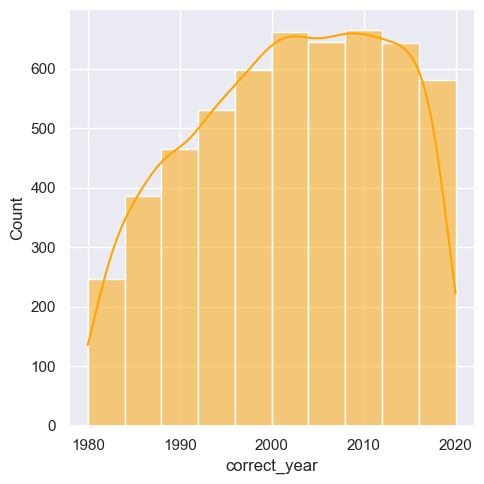

<Figure size 1200x500 with 0 Axes>

In [29]:

sns.set(style="darkgrid")
sns.displot(data=movie_df,x="correct_year",kde=True,color="orange",bins=10)
plt.figure(figsize=(12,5))

In [30]:
# 10 oldest movies
old_movies= movie_df.sort_values("correct_year")[["name","score","correct_year"]].head(10)
old_movies

,name,score,correct_year
0,The Shining,8.4,1980
28,Brubaker,7.2,1980
29,American Gigolo,6.2,1980
35,Private Benjamin,6.2,1980
36,The Hollywood Knights,6.3,1980
37,Motel Hell,6.0,1980
42,The Stunt Man,7.1,1980
46,The Island,5.3,1980
23,Xanadu,5.3,1980
48,The Nude Bomb,5.1,1980


In [31]:
#10 newest movies
new_movies = movie_df.sort_values("correct_year",ascending=False)[["name","score","correct_year"]].head(10)
new_movies

,name,score,correct_year
7652,The Eight Hundred,6.8,2020
7646,The Invisible Man,7.1,2020
7525,Weathering with You,7.5,2020
7604,Mine 9,6.4,2020
7643,Tenet,7.4,2020
7645,Birds of Prey,6.1,2020
7462,1917,8.3,2020
7648,Bad Boys for Life,6.6,2020
7649,Sonic the Hedgehog,6.5,2020
7650,Dolittle,5.6,2020


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'South Korea'),
  Text(9, 0, 'Italy')])

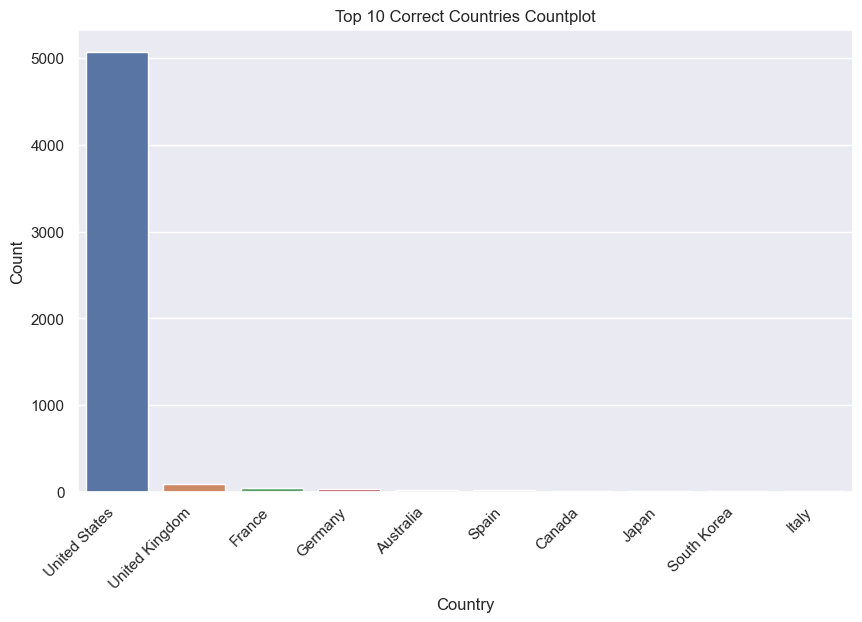

In [32]:
# top 10 countires with most movies
#country names
category_counts = movie_df['correct_country'].value_counts()

# Step 2: Select the top 10 categories based on highest counts
top_10_categories = category_counts.nlargest(10)

# Step 3: Create the countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Correct Countries Countplot')
plt.xticks(rotation=45, ha='right')

In [33]:
# count of movies released by company
company = pd.DataFrame(movie_df["company"].value_counts().head(10))
company

,count
company,
Universal Pictures,330
Columbia Pictures,302
Warner Bros.,298
Paramount Pictures,279
Twentieth Century Fox,209
New Line Cinema,155
Walt Disney Pictures,107
Touchstone Pictures,105
Metro-Goldwyn-Mayer (MGM),99


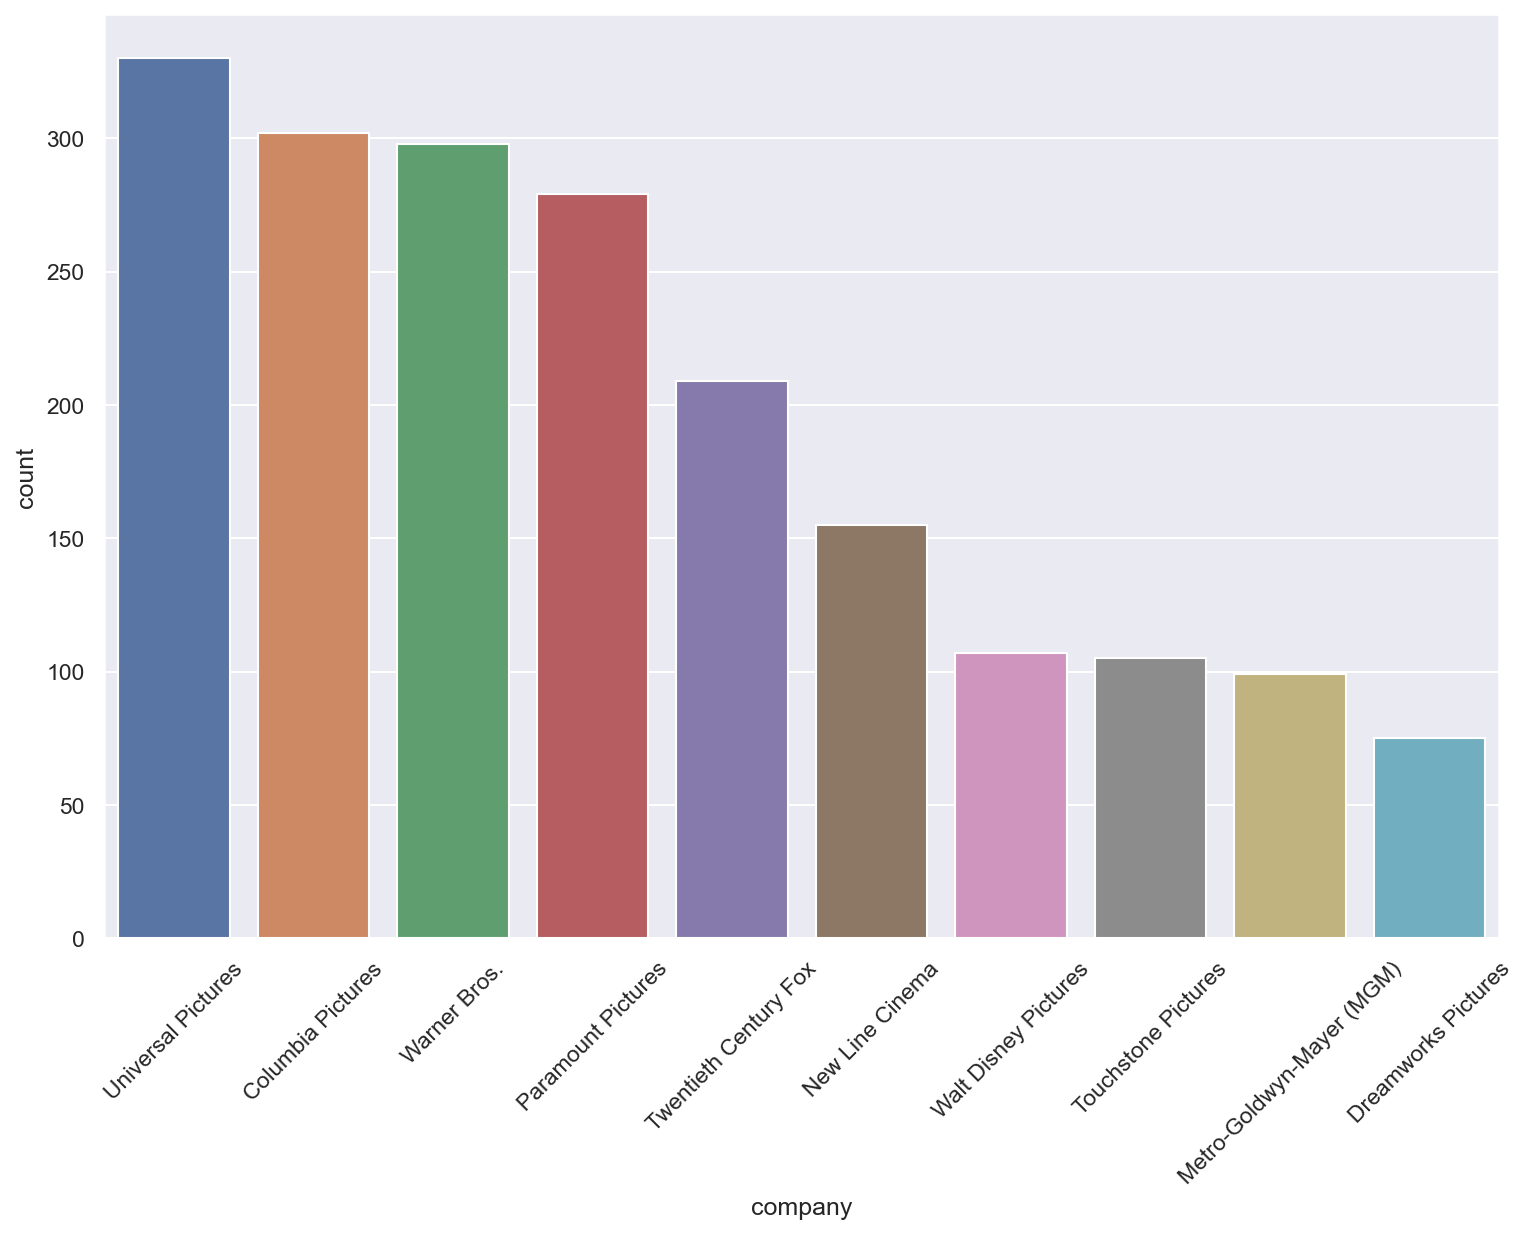

In [34]:
plt.figure(figsize=(12,8),dpi=150)
sns.barplot(x=company.index,y=company["count"])
plt.xticks(rotation=45)
plt.show()

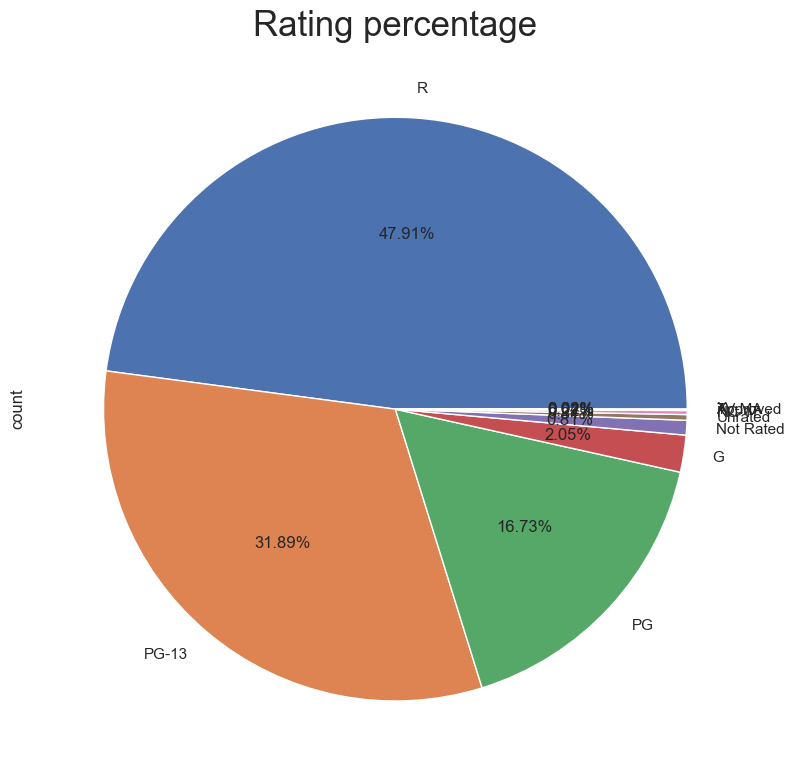

In [35]:
# distribution of ratings
movie_df["rating"].value_counts().plot.pie(autopct="%.2f%%",figsize=(10,8))
plt.title("Rating percentage",fontsize=25)
plt.tight_layout()


<Axes: xlabel='rating', ylabel='count'>

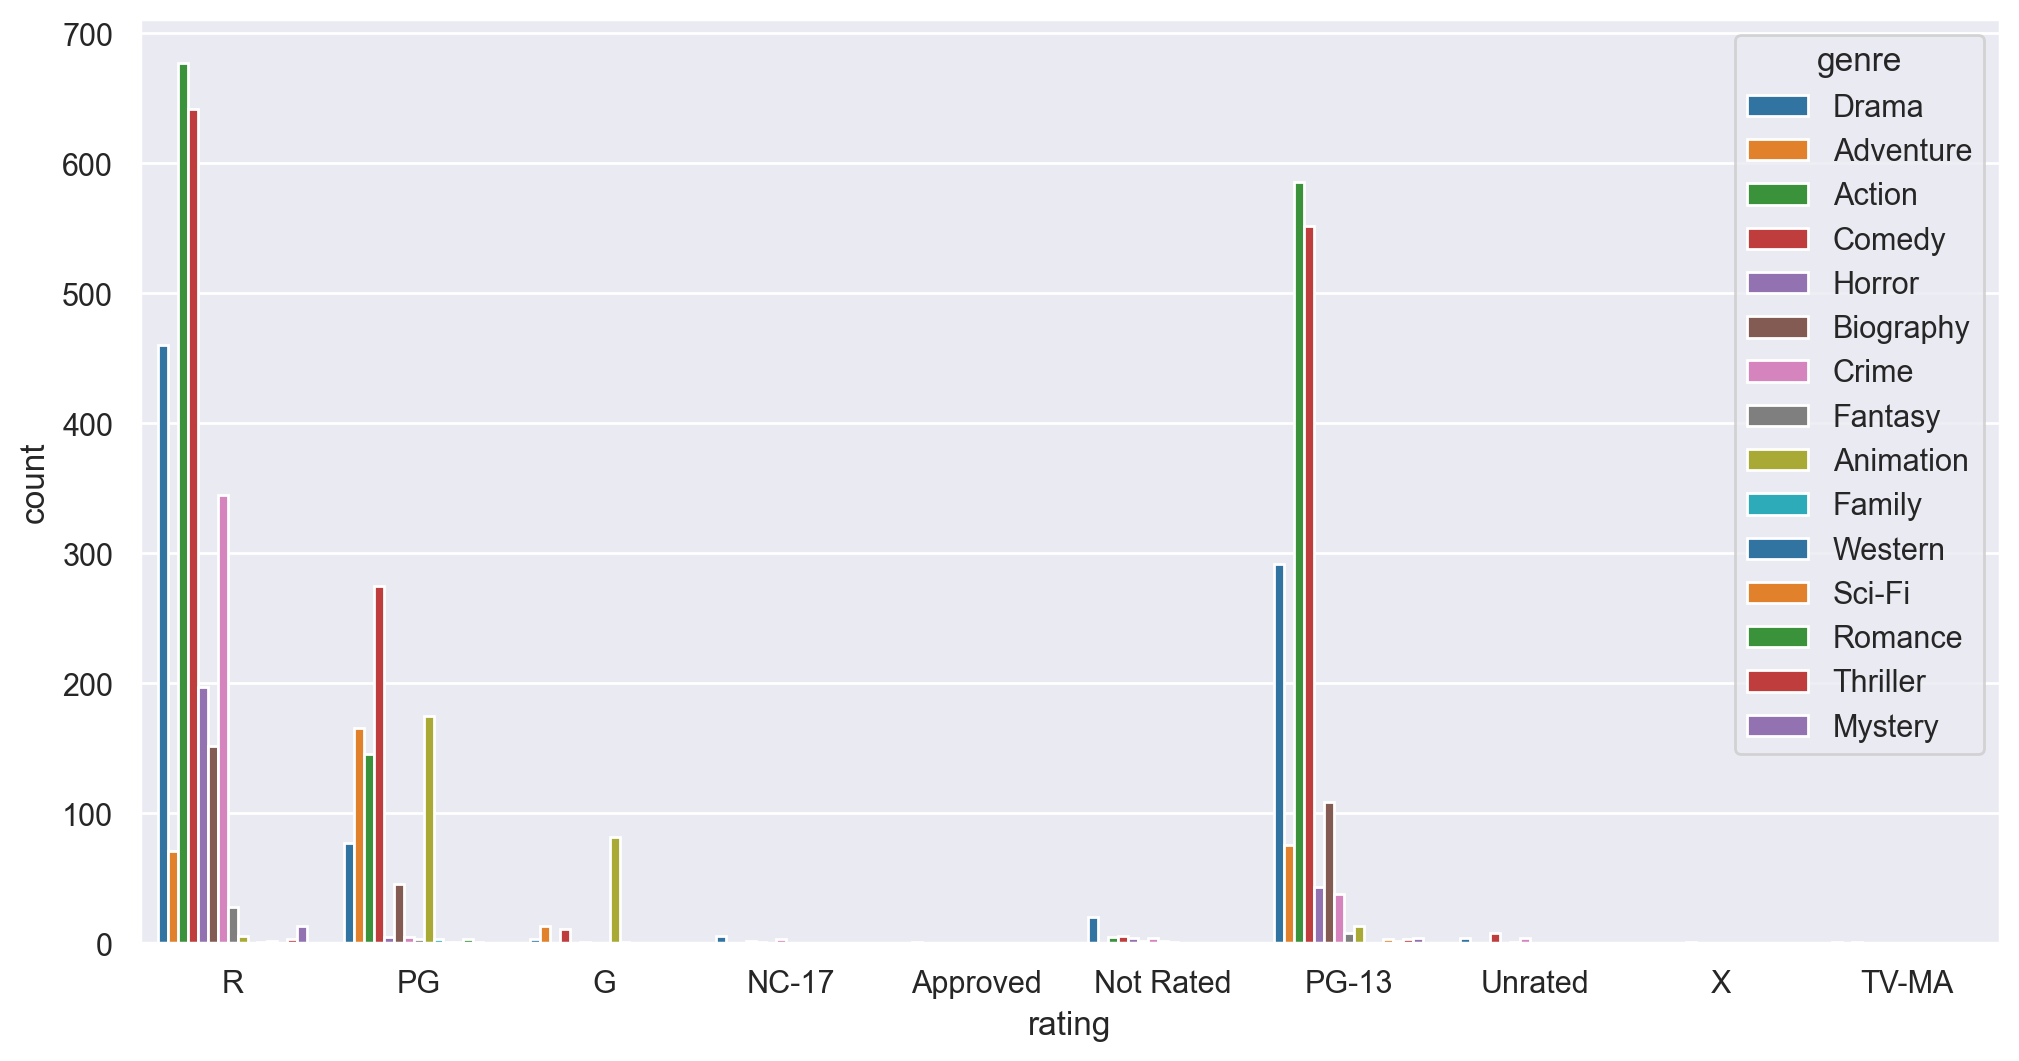

In [36]:
#Count of movie rating
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=movie_df,x="rating",hue="genre",palette="tab10")



- We see that R rating and PG-13 were the most released type of movies and that action,comedy and drama the most common genre
- G rated movies are mostly family ones! (as expected!)

In [37]:
#lets see some adventure movies from USA
Adventure_usa=movie_df[movie_df["genre"] == "Adventure"] 
Adventure_usa = Adventure_usa[Adventure_usa["correct_country"]== "United States"]
Adventure_usa[["name","correct_year","correct_country"]].head(10)


,name,correct_year,correct_country
1,The Blue Lagoon,1980,United States
11,The Gods Must Be Crazy,1984,United States
12,Popeye,1980,United States
21,Heaven's Gate,1981,United States
75,The Last Flight of Noah's Ark,1980,United States
100,Excalibur,1981,United States
108,Time Bandits,1981,United States
120,Tarzan the Ape Man,1981,United States
130,Quest for Fire,1982,United States
177,Sphinx,1981,United States


In [38]:
corr_matrix  = movie_df.corr(method="pearson",numeric_only=True)

Text(101.78125000000001, 0.5, 'Movie Features')

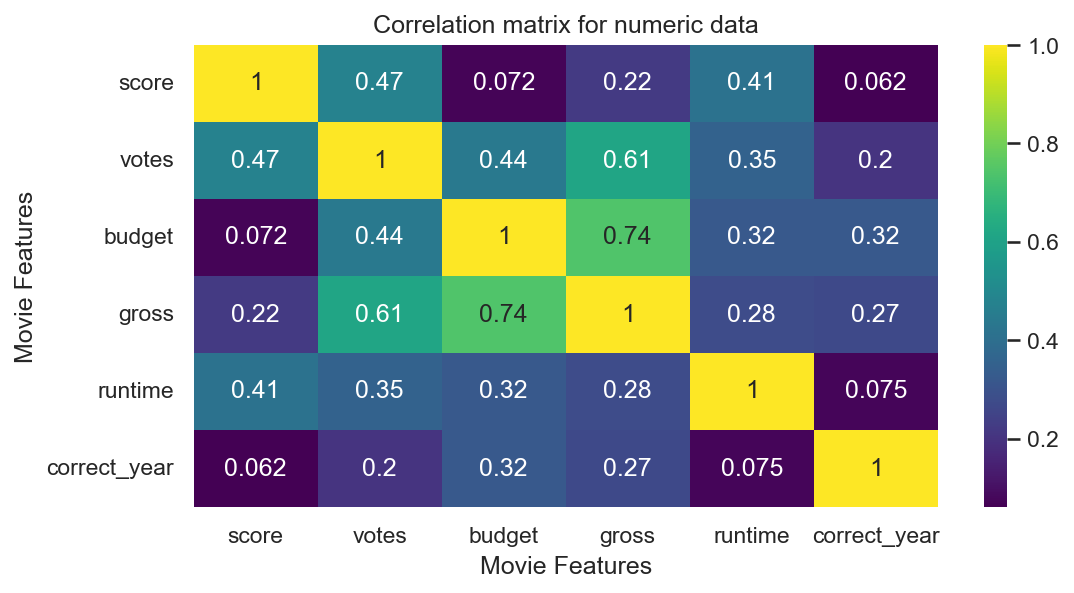

In [39]:
plt.figure(figsize=(8,4),dpi=150)
sns.heatmap(corr_matrix,cmap="viridis",annot =True)
plt.title("Correlation matrix for numeric data")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

- There are clear correlation between 'Budget' and 'Gross', and also a relationship between the 'Vote' and 'Gross' variables

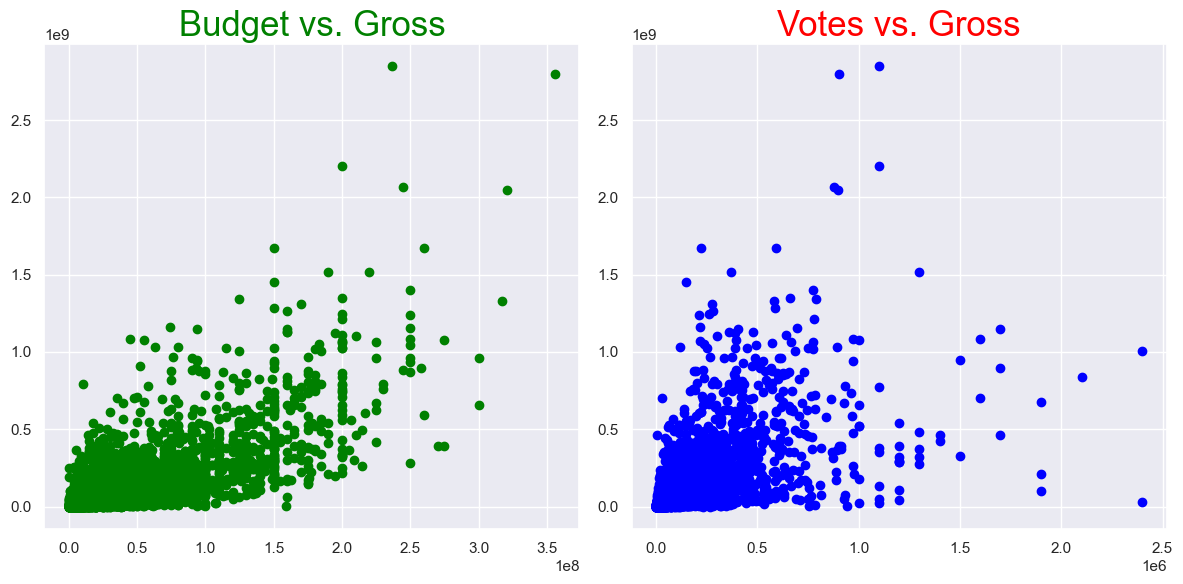

In [40]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

axes[0].scatter(y=movie_df["gross"],x=movie_df["budget"],c="green")
axes[0].set_title('Budget vs. Gross', c = 'green', fontsize = 25)
axes[1].scatter(y=movie_df["gross"],x=movie_df["votes"],c="blue")
axes[1].set_title('Votes vs. Gross', c ='red', fontsize = 25)
plt.tight_layout()

* Conclusion:

- Low budget movies and low voted movies all seem to have poor profit.
- As the budget raises, there is an exponencial tendency for gross improvement.
- There is no clear relation in how much a movie profits from the amount of votes it has.

<Axes: xlabel='budget', ylabel='gross'>

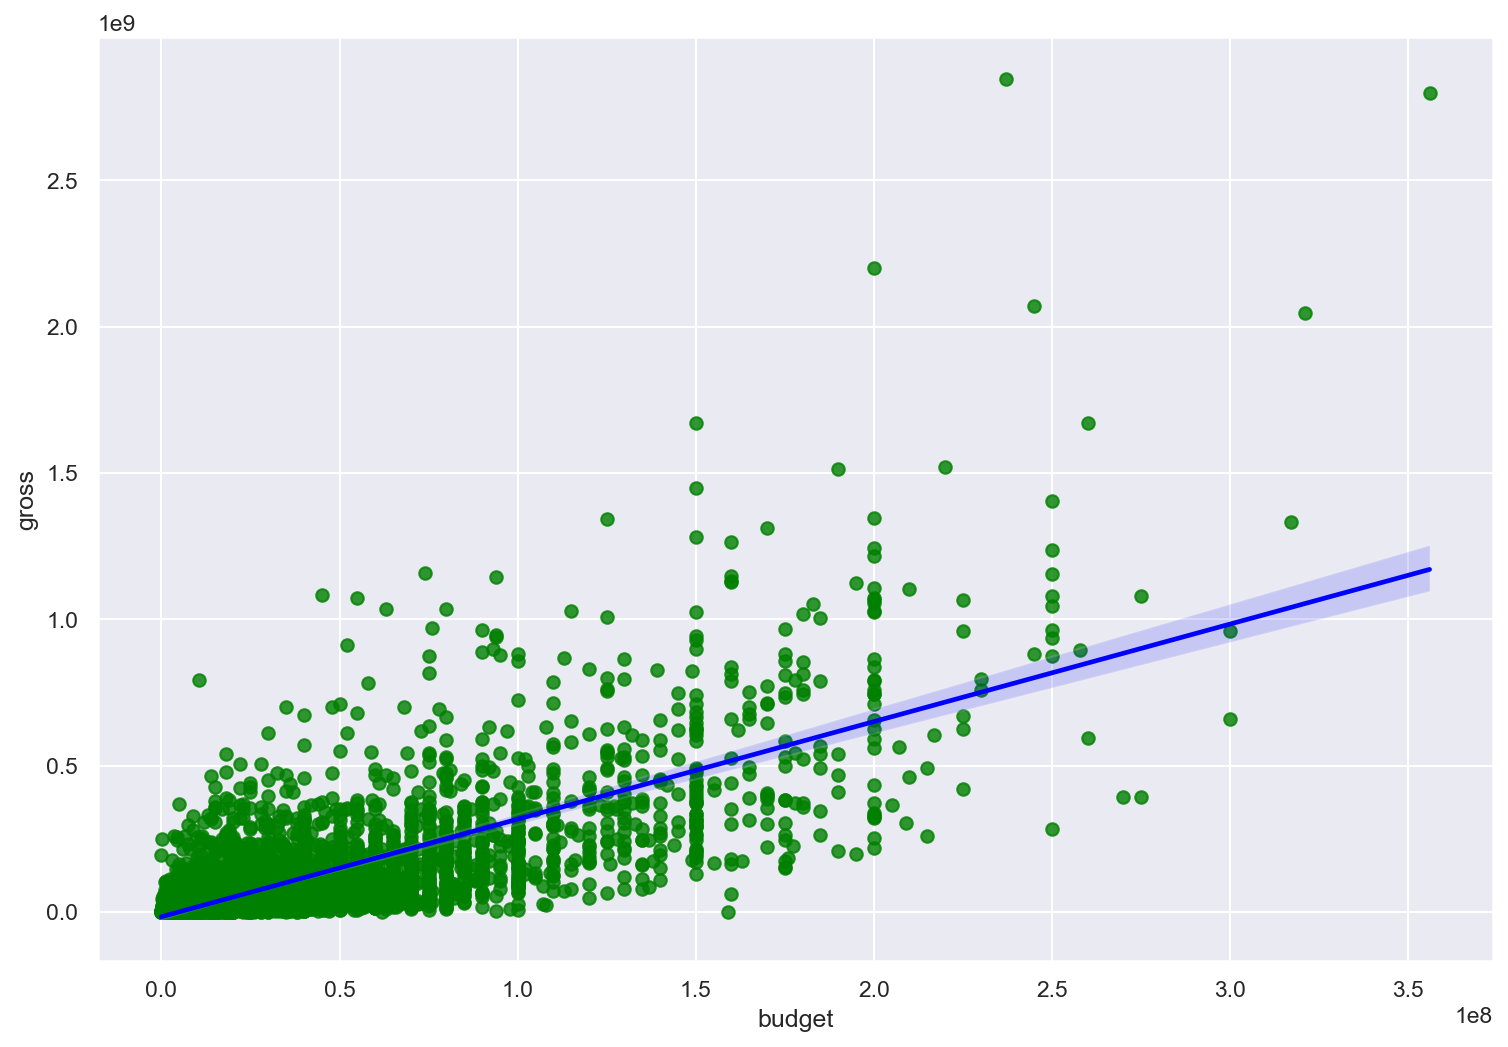

In [42]:
plt.figure(figsize=(12,8),dpi=150)
sns.regplot(data=movie_df,x="budget",y="gross",scatter_kws={"color":"green"},line_kws={"color":"blue"})



<Axes: xlabel='votes', ylabel='gross'>

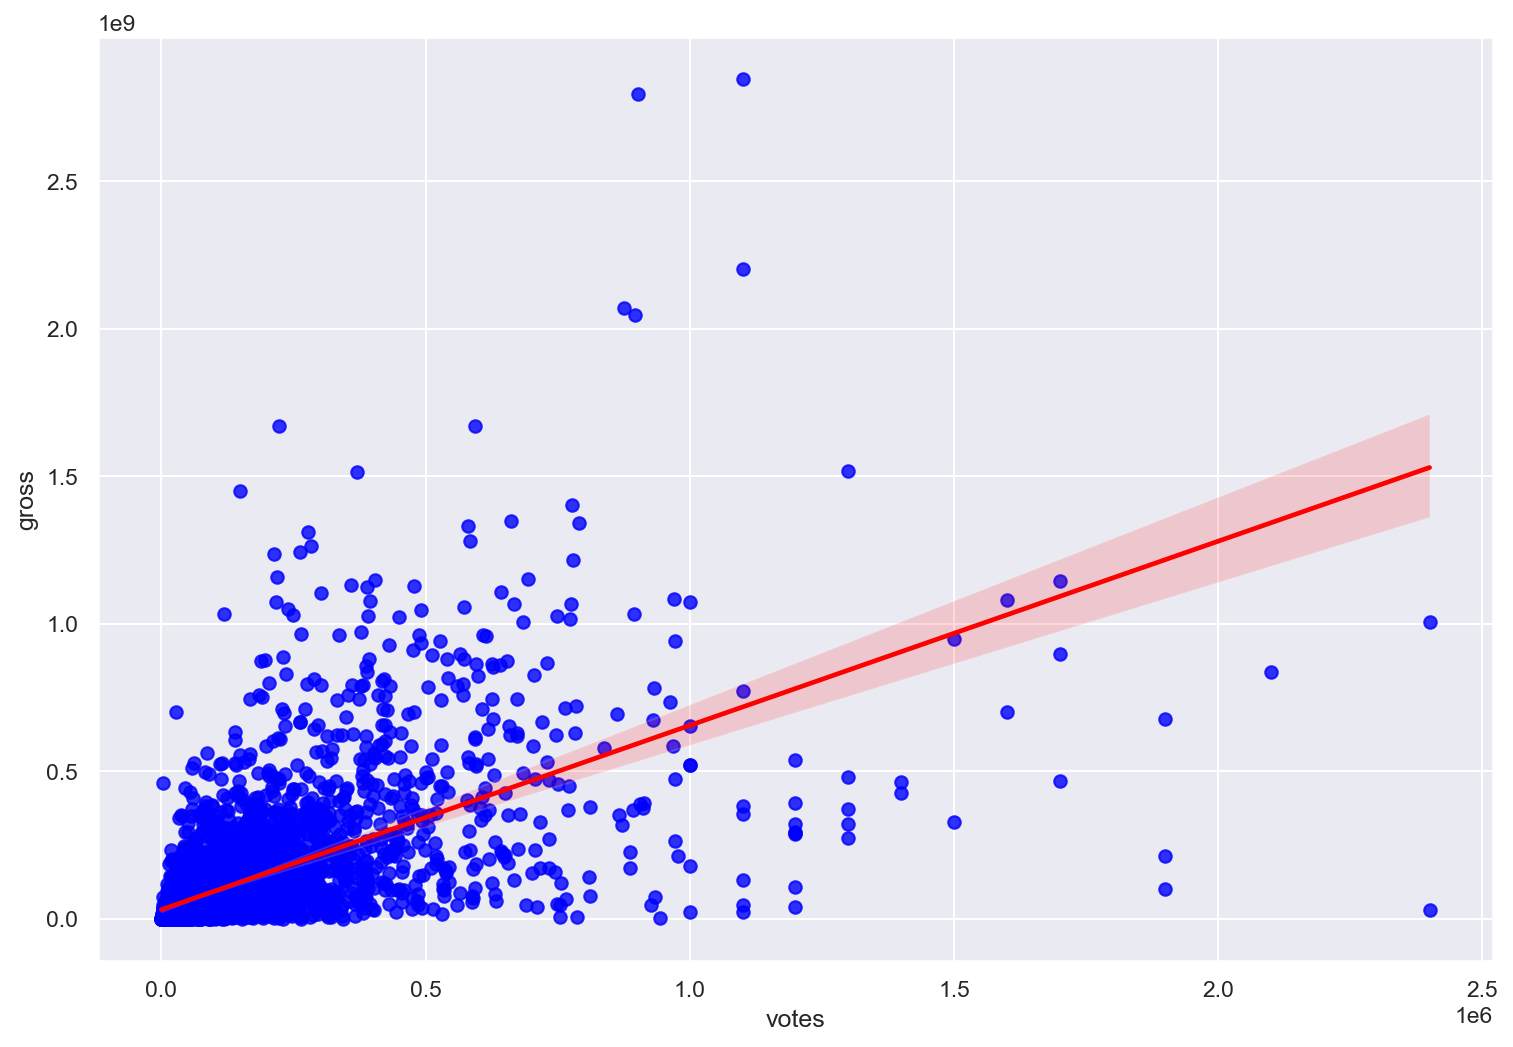

In [232]:
plt.figure(figsize=(12,8),dpi=150)
sns.regplot(data=movie_df,x="votes",y="gross",scatter_kws={"color":"blue"},line_kws={"color":"red"})

Text(0.5, 1.0, 'Runtime with  a left skewed distribution')

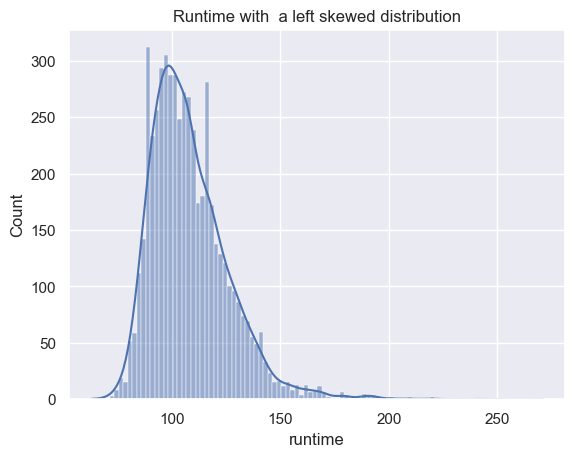

In [43]:
sns.histplot(data=movie_df,x="runtime",kde=True,bins=100)
plt.title('Runtime with  a left skewed distribution')

Text(0.5, 1.0, 'Scorewith Normal distribution')

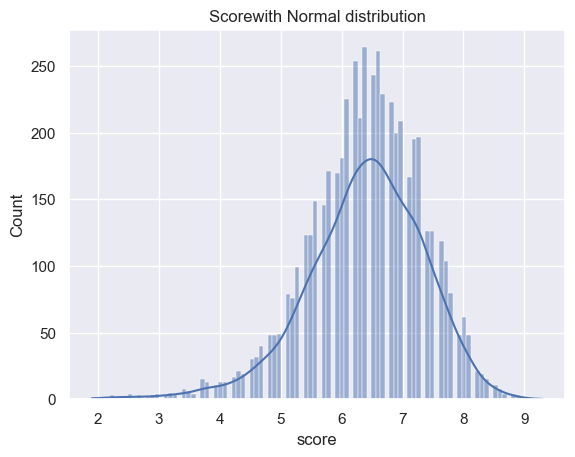

In [44]:
sns.histplot(data=movie_df,x="score",kde=True,bins=100)
plt.title('Scorewith Normal distribution')


- Conclusion:

- Runtime almost follows a normal distribution around 100 min of duration, but has little skewness to the left.
  Score values follow a normal distribution, around 6.4